<a href="https://www.kaggle.com/code/mmsssaaaa/linear-regression-bbri-ok?scriptVersionId=91274988" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jkse0103/JKSE0103.csv
/kaggle/input/bbri0103/BBRI0103.csv


# LIBRARY

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# BUSINESS UNDERSTANDING

# # Data Information

Dataset yang dipakai ada 2 dan didapatkan dari Yahoo Finance, dengan keterangan sebagai berikut :
* Dataset JKSE per bulan selama 1 tahun (periode tanggal 1 Maret 2021 - 1 Maret 2022)
* Dataset BBRI per bulan selama 1 tahun (periode tanggal 1 Maret 2021 - 1 Maret 2022)

# # Tabel Information - Dataset JKSE

In [3]:
jkse_raw = pd.read_csv('../input/jkse0103/JKSE0103.csv')
jkse_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13 non-null     object 
 1   Open       13 non-null     float64
 2   High       13 non-null     float64
 3   Low        13 non-null     float64
 4   Close      13 non-null     float64
 5   Adj Close  13 non-null     float64
 6   Volume     13 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 856.0+ bytes


In [4]:
display(jkse_raw)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-01,6281.856934,6394.452148,5892.645020,5985.521973,5985.521973,3451452000
1,2021-04-01,5988.022949,6115.620117,5883.523926,5995.616211,5995.616211,2813253600
2,2021-05-01,5999.661133,6005.087891,5742.038086,5947.462891,5947.462891,2453433400
3,2021-06-01,6002.480957,6134.881836,5884.917969,5985.488770,5985.488770,3980614000
4,2021-07-01,6001.121094,6166.305176,5947.618164,6070.039063,6070.039063,3225744000
5,2021-08-01,6098.007813,6263.539063,5938.407227,6150.298828,6150.298828,4218994600
6,2021-09-01,6157.820801,6286.942871,5982.766113,6286.942871,6286.942871,4359649400
7,2021-10-01,6269.237793,6687.133789,6202.905762,6591.346191,6591.346191,3960713500
8,2021-11-01,6618.122070,6754.463867,6480.009766,6533.932129,6533.932129,4188202600
9,2021-12-01,6544.517090,6688.378906,6484.578125,6581.481934,6581.481934,4373800600


In [5]:
print(jkse_raw.shape)

(13, 7)


# # Tabel Information - Dataset BBRI

In [6]:
bbri_raw = pd.read_csv('../input/bbri0103/BBRI0103.csv')
bbri_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13 non-null     object 
 1   Open       13 non-null     float64
 2   High       13 non-null     float64
 3   Low        13 non-null     float64
 4   Close      13 non-null     float64
 5   Adj Close  13 non-null     float64
 6   Volume     13 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 856.0+ bytes


In [7]:
display(bbri_raw)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-01,4800.000000,4880.0,4260.000000,4400.000000,4141.627441,2469002800
1,2021-04-01,4350.000000,4460.0,4050.000000,4050.000000,3812.180176,2752110600
2,2021-05-01,4060.000000,4280.0,3820.000000,4260.000000,4097.568359,2769409500
3,2021-06-01,4350.000000,4390.0,3860.000000,3940.000000,3789.770020,3325217700
4,2021-07-01,3940.000000,4030.0,3700.000000,3710.000000,3568.539795,2132270600
5,2021-08-01,3770.000000,4090.0,3481.758057,3572.665527,3436.441650,2290574201
6,2021-09-01,3572.665527,3880.0,3463.576416,3850.000000,3703.201660,6073477827
7,2021-10-01,3850.000000,4460.0,3830.000000,4250.000000,4087.949951,4745652300
8,2021-11-01,4330.000000,4340.0,4080.000000,4090.000000,3934.050537,2919948500
9,2021-12-01,4090.000000,4250.0,4050.000000,4110.000000,3953.288086,2371759500


In [8]:
print(bbri_raw.shape)

(13, 7)


# DATA PREPARATION
Data yang akan diambil adalah data closing tiap bulan dari 2 dataset tersebut, sehingga hanya diperlukan kolom close saja untuk masing-masing dataset

# # Data Closing JKSE

In [9]:
jkse_close = pd.read_csv('../input/jkse0103/JKSE0103.csv', usecols =['Close'])
jkse = jkse_close.rename(columns={'Close': 'JKSE'})
display(jkse)

,JKSE
0,5985.521973
1,5995.616211
2,5947.462891
3,5985.488770
4,6070.039063
5,6150.298828
6,6286.942871
7,6591.346191
8,6533.932129
9,6581.481934


# # Data Closing BBRI 

In [10]:
bbri_close = pd.read_csv('../input/bbri0103/BBRI0103.csv', usecols = ['Close'])
bbri = bbri_close.rename(columns={'Close': 'BBRI'})
display(bbri)

,BBRI
0,4400.000000
1,4050.000000
2,4260.000000
3,3940.000000
4,3710.000000
5,3572.665527
6,3850.000000
7,4250.000000
8,4090.000000
9,4110.000000


# # Merging Data
Dilakukan penggabungan data closing JKSE dan BBRI

In [11]:
data = jkse.join(bbri)
display(data)

,JKSE,BBRI
0,5985.521973,4400.000000
1,5995.616211,4050.000000
2,5947.462891,4260.000000
3,5985.488770,3940.000000
4,6070.039063,3710.000000
5,6150.298828,3572.665527
6,6286.942871,3850.000000
7,6591.346191,4250.000000
8,6533.932129,4090.000000
9,6581.481934,4110.000000


In [12]:
print(data.shape)

(13, 2)


# LINEAR REGRESSION MODEL
Membuat Model Linear Regressing dari 2 data yang telah disiapkan

In [13]:
X = data['JKSE'].values
Y = data['BBRI'].values

In [14]:
#menentukan nilai mean dari X dan Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#menghitung jumlah nilai X untuk iterasi
m = len(X)

#menghitung nilai slope/kemiringan (m atau b1)
cov = 0
var = 0
for i in range(m):
    cov += (X[i] - mean_x) * (Y[i] - mean_y)
    var += (X[i] - mean_x) ** 2
b1 = cov/var

#menghitung nilai konstanta/intercept (c)
c = mean_y - (b1 * mean_x)

print(b1,c)

0.5009960032781275 934.7484660201567


In [15]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

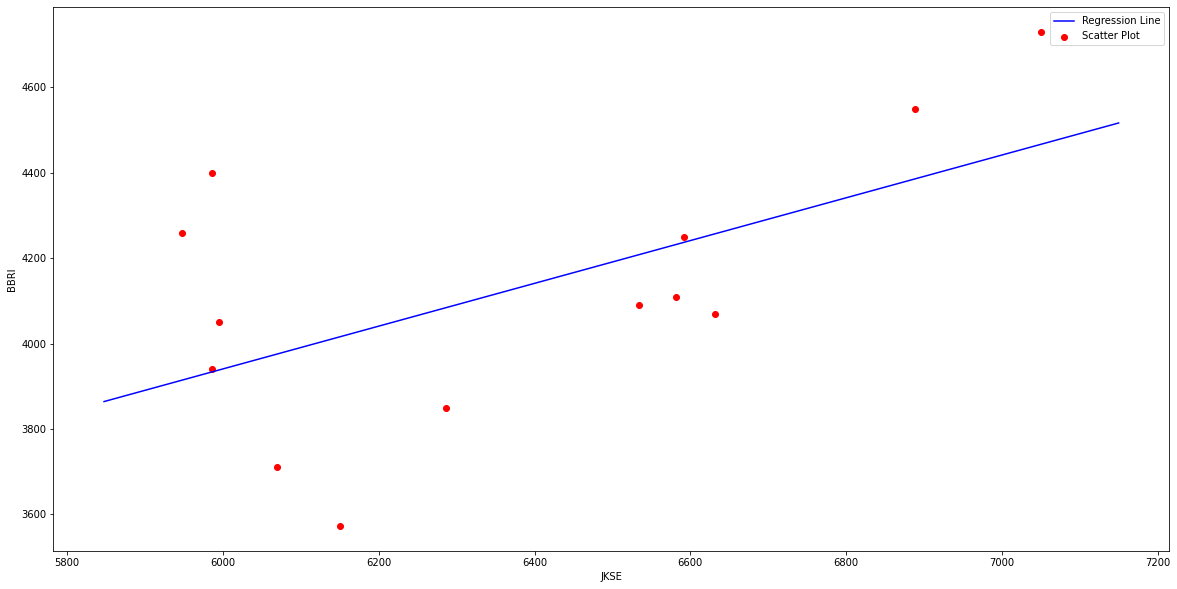

In [16]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = c + b1 * x

plt.plot(x,y, color='blue', label = 'Regression Line')

plt.scatter(X,Y, color='red', label = 'Scatter Plot')
plt.xlabel('JKSE')
plt.ylabel('BBRI')
plt.legend()
plt.show()

# R-Squared

In [17]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = c + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.3360288322778223


* # CONCLUSION

Dari hasil diatas didapatkan kesimpulan bahwa :
* Model linear regression menghasilkan slope positive
* JKSE memberikan kontribusi 33,6% kepada prediksi dari BBRI